# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


In [23]:
#Set units for search
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | angoche
Processing Record 4 of Set 1 | mezen
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | almeria
Processing Record 8 of Set 1 | nantucket
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | colombo
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | tezu
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | victoria point
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizan teferi,6.9833,35.5833,20.10,75,40,0.95,ET,1692767276
1,shangrao,28.4532,117.9686,29.50,77,46,2.04,CN,1692767276
2,kodiak,57.7900,-152.4072,12.73,94,100,0.00,US,1692767277
3,iqaluit,63.7506,-68.5145,6.50,93,100,11.62,CA,1692767278
4,torbay,47.6666,-52.7314,16.53,97,100,1.31,CA,1692767278


In [26]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizan teferi,6.9833,35.5833,20.10,75,40,0.95,ET,2023-08-23
1,shangrao,28.4532,117.9686,29.50,77,46,2.04,CN,2023-08-23
2,kodiak,57.7900,-152.4072,12.73,94,100,0.00,US,2023-08-23
3,iqaluit,63.7506,-68.5145,6.50,93,100,11.62,CA,2023-08-23
4,torbay,47.6666,-52.7314,16.53,97,100,1.31,CA,2023-08-23


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizan teferi,6.9833,35.5833,20.10,75,40,0.95,ET,2023-08-23
1,shangrao,28.4532,117.9686,29.50,77,46,2.04,CN,2023-08-23
2,kodiak,57.7900,-152.4072,12.73,94,100,0.00,US,2023-08-23
3,iqaluit,63.7506,-68.5145,6.50,93,100,11.62,CA,2023-08-23
4,torbay,47.6666,-52.7314,16.53,97,100,1.31,CA,2023-08-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

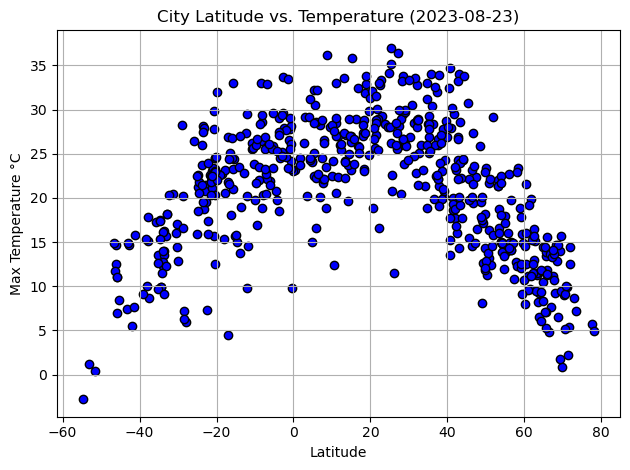

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

#save figure

plt.savefig('output_data_Fig1')
# Show plot
plt.show()

#### Latitude Vs. Humidity

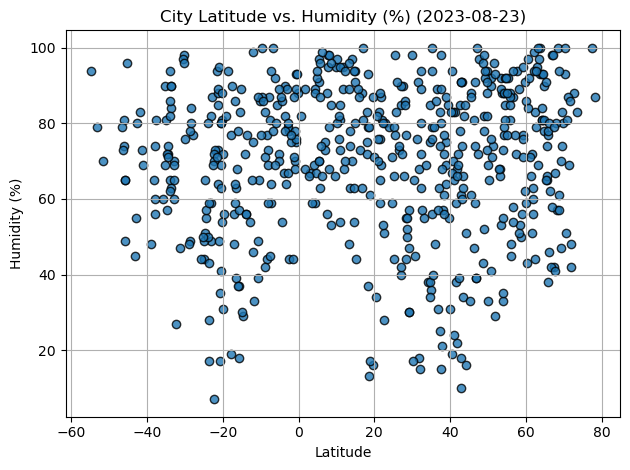

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig('output_data_Fig2')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

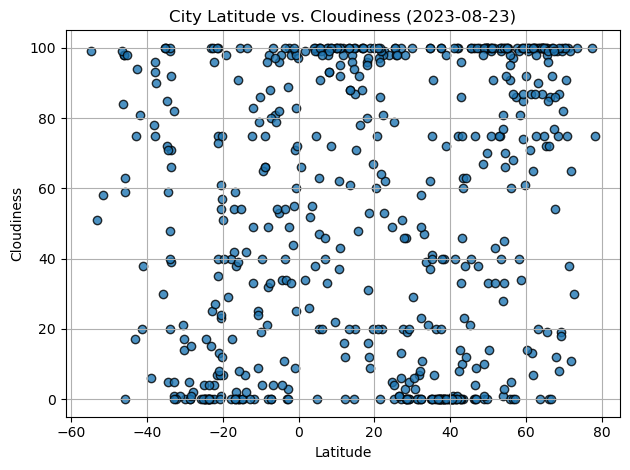

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig('output_data_Fig3')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

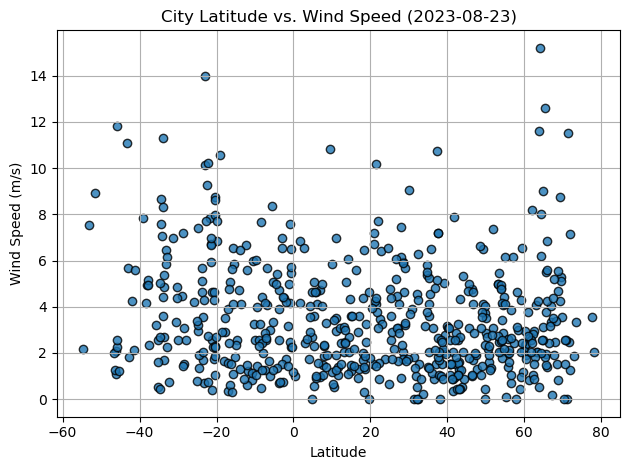

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig('output_data_Fig4')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x,y, xlabel="",ylabel=""):
    # slope and intercept

    coeffs = np.polyfit(x, y, 1)
    slope = coeffs[0]
    intercept = coeffs[1]
    r = np.corrcoef(x, y)[0, 1]
  
    predict = slope*x + intercept
    
    plt.scatter(x,y)
    plt.plot(x, predict, color='red')

    line_eq = f'y = {slope: .2f}x + {intercept: .2f}'
    plt.text(0.05,0.05, line_eq, transform=plt.gca().transAxes, color='red', fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    
    plt.show()

    return f"The r-value is: {r}"

In [48]:
# Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizan teferi,6.9833,35.5833,20.10,75,40,0.95,ET,2023-08-23
1,shangrao,28.4532,117.9686,29.50,77,46,2.04,CN,2023-08-23
2,kodiak,57.7900,-152.4072,12.73,94,100,0.00,US,2023-08-23
3,iqaluit,63.7506,-68.5145,6.50,93,100,11.62,CA,2023-08-23
4,torbay,47.6666,-52.7314,16.53,97,100,1.31,CA,2023-08-23


In [49]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,ushuaia,-54.8000,-68.3000,-2.78,94,99,2.18,AR,2023-08-23
7,mahebourg,-20.4081,57.7000,24.58,80,54,8.76,MU,2023-08-23
8,buala,-8.1450,159.5921,28.62,73,32,4.43,SB,2023-08-23
10,puerto ayora,-0.7393,-90.3518,24.19,93,60,2.24,EC,2023-08-23
12,quelimane,-17.8786,36.8883,20.59,77,0,2.91,MZ,2023-08-23


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,ushuaia,-54.8000,-68.3000,-2.78,94,99,2.18,AR,2023-08-23
7,mahebourg,-20.4081,57.7000,24.58,80,54,8.76,MU,2023-08-23
8,buala,-8.1450,159.5921,28.62,73,32,4.43,SB,2023-08-23
10,puerto ayora,-0.7393,-90.3518,24.19,93,60,2.24,EC,2023-08-23
12,quelimane,-17.8786,36.8883,20.59,77,0,2.91,MZ,2023-08-23


###  Temperature vs. Latitude Linear Regression Plot

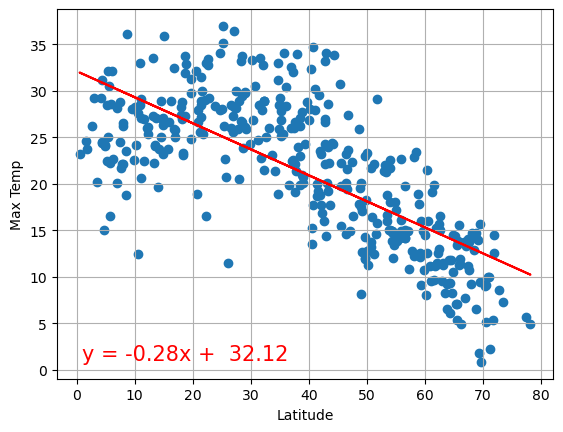

'The r-value is: -0.7272011985519783'

In [61]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df["Max Temp"]
north_x= northern_hemi_df["Lat"]
plot_lin_reg(north_x, north_temp,xlabel="Latitude",ylabel="Max Temp")

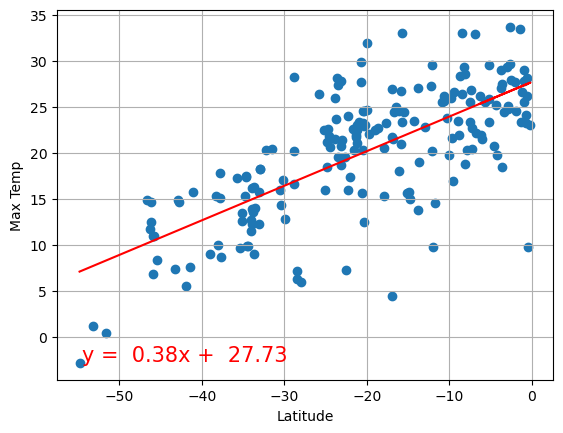

'The r-value is: 0.7151672747308508'

In [52]:
# Linear regression on Southern Hemisphere
south_temp = southern_hemi_df["Max Temp"]
south_x = southern_hemi_df["Lat"]
plot_lin_reg(south_x, south_temp, xlabel="Latitude", ylabel="Max Temp")


**Discussion about the linear relationship:** There appears to be a strong correlation between latitude and max temperature. According to the data, as you get closer to the equator (0* lat) the maximum temperature rises.

### Humidity vs. Latitude Linear Regression Plot

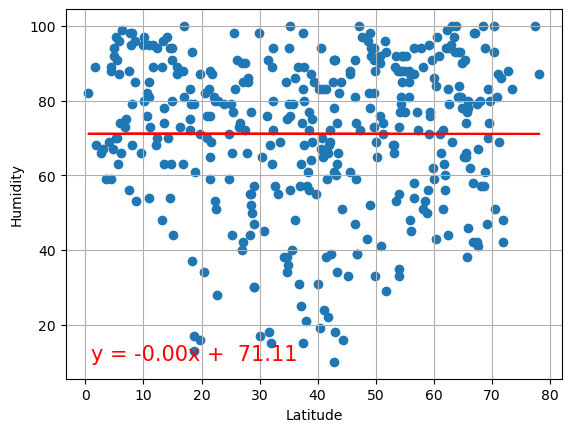

'The r-value is: -0.0003383114477116922'

In [53]:
# Northern Hemisphere
north_hum = northern_hemi_df["Humidity"]
plot_lin_reg(north_x, north_hum, xlabel="Latitude", ylabel="Humidity")

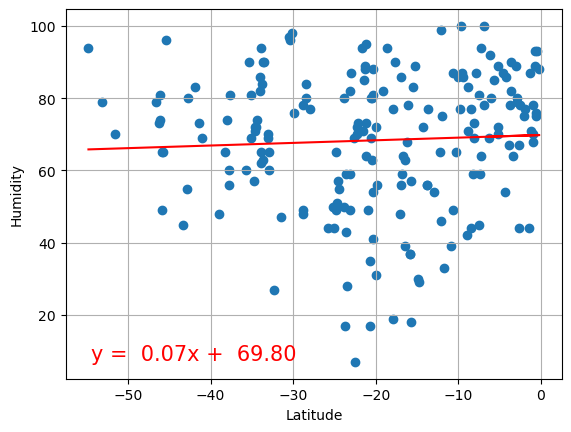

'The r-value is: 0.0506119603360743'

In [54]:
# Southern Hemisphere
south_hum = southern_hemi_df["Humidity"]
plot_lin_reg(south_x,south_hum, xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** Humidity and latitude do not appear to have a strong correlation according to the images, which have almost no incline/decline. I do not think a linear regression model is the best tool to provide analysis on these measures.

### Cloudiness vs. Latitude Linear Regression Plot

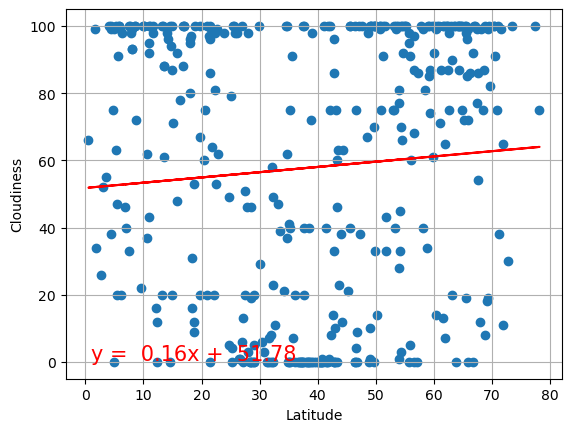

'The r-value is: 0.07773367470990357'

In [55]:
# Northern Hemisphere
north_cloud = northern_hemi_df["Cloudiness"]
plot_lin_reg(north_x, north_cloud, xlabel="Latitude", ylabel="Cloudiness")

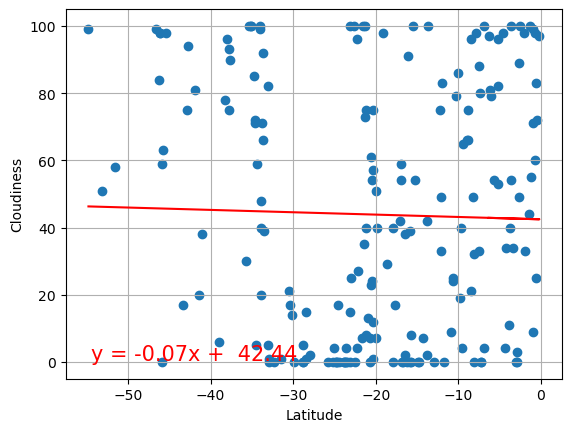

'The r-value is: -0.02491279489106129'

In [56]:
# Southern Hemisphere
south_cloud = southern_hemi_df["Cloudiness"]
plot_lin_reg(south_x, south_cloud, xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** Cloudiness vs Latitude in both the Northern and Southern Hemispheres have very slight movement along the linear line; another case where there doesn't seem to be a strong correlation.

### Wind Speed vs. Latitude Linear Regression Plot

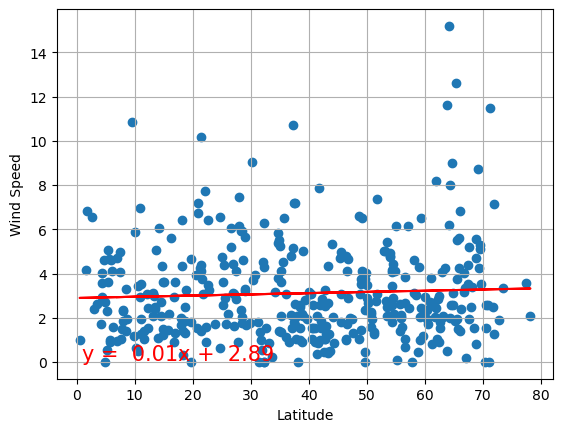

'The r-value is: 0.04978155241165931'

In [57]:
# Northern Hemisphere
north_wind = northern_hemi_df["Wind Speed"]
plot_lin_reg(north_x, north_wind, xlabel="Latitude", ylabel="Wind Speed") 

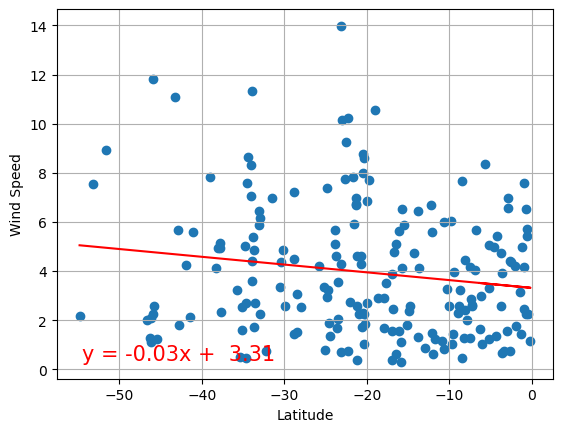

'The r-value is: -0.15740940834614797'

In [58]:
# Southern Hemisphere
south_wind = southern_hemi_df["Wind Speed"]
plot_lin_reg(south_x, south_wind, xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** Wind speed in the Norther Hemisphere has a weak correlation to Latitude; there's only just a very slight increase in wind speed and Lat increases. The Southern Hemisphere has a little less movement as you get closer to the equator.